In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sl

In [2]:
# read the data
df = pd.read_csv('./sim_2024-01-26_10-46-01_scanning.csv')

In [3]:
latency_y_max = 0.8
HitCountsmax = 70

rotangle = 30
figure_size = (20,5)
fontSize = 13

[[array([0.0484]), array([0.1172]), array([0.0103]), array([0.1317])], [array([0.054]), array([0.1137]), array([0.0106]), array([0.1294])], [array([0.0502]), array([0.1773]), array([0.0129]), array([0.1156])], [array([0.0808]), array([0.1747]), array([0.0137]), array([0.1128])], [array([0.0512]), array([0.1638]), array([0.0226]), array([0.1085])], [array([0.0468]), array([0.1531]), array([0.0332]), array([0.1083])], [array([0.0808]), array([0.2111]), array([0.0476]), array([0.1093])], [array([0.1027]), array([0.2061]), array([0.0523]), array([0.1067])], [array([0.0434]), array([0.1212]), array([0.0092]), array([0.13])], [array([0.0644]), array([0.1134]), array([0.0097]), array([0.132])], [array([0.0502]), array([0.1735]), array([0.0154]), array([0.1194])], [array([0.0782]), array([0.1847]), array([0.0155]), array([0.1293])], [array([0.064]), array([0.162]), array([0.0363]), array([0.1327])], [array([0.0729]), array([0.1514]), array([0.0223]), array([0.1242])], [array([0.0824]), array([

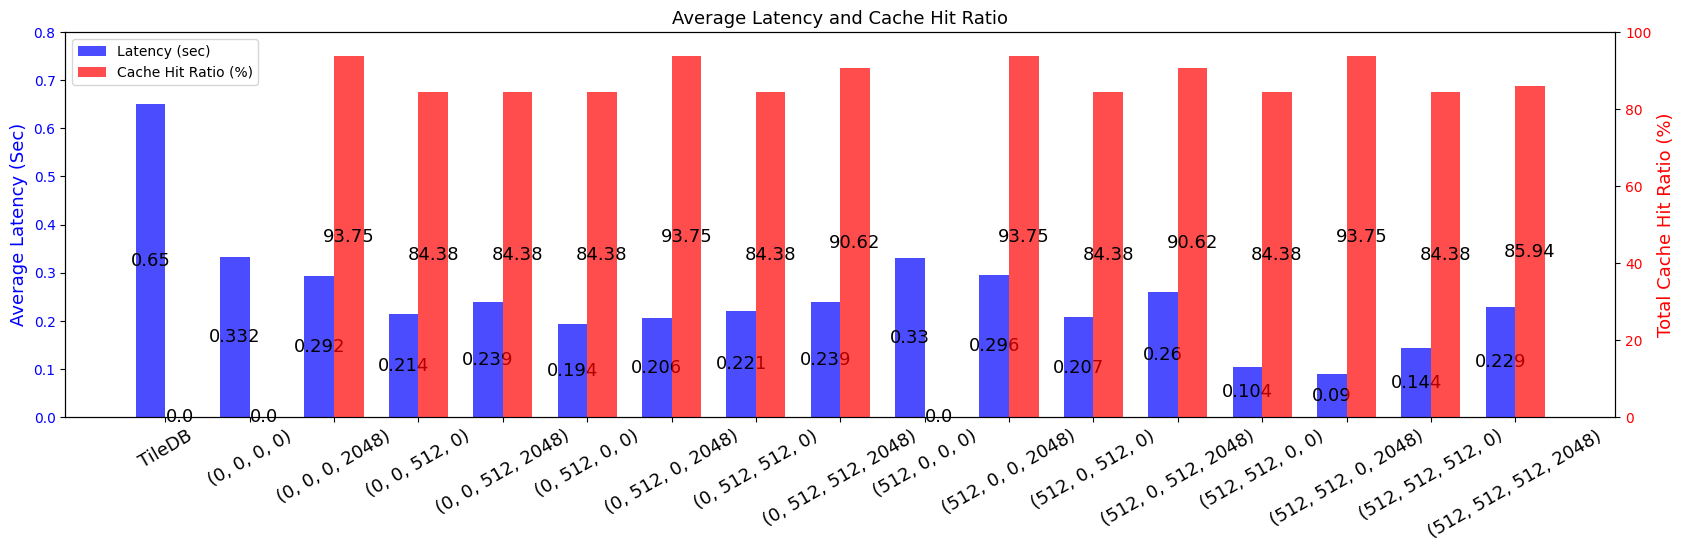

In [4]:
# 固定する変数
tol = 0.1
Tclatency = 0
UserAnal = 0.5 # ユーザの処理時間
nReqs = 64
accessPattern = "./request_maker/request_files/numReqs=64_recycleRatio=0.0_maxdistance=62.0_accessDensity=3.12_randomJampRatio_5.pkl"


df_arch = df[(df["tol"] == 0.1) & (df["anlTime"] == UserAnal) & (df["nReqs"] == nReqs) & (df["reqPatrn"] == accessPattern)]
df_arch = df_arch.drop(["nReqs","reqPatrn","blkSize"],axis=1)

# ここで、欲しいキャッシュ構成を持ってきてください
L1Sizes = [0,512]
L2Sizes = [0,512]
L3Sizes = [0,512]
L4Sizes = [0,2048]



hanrei = ["TileDB"]
latency = [[0.65]]
AllMissTime = [[64]]
HitUchiwake = []
UserReqLatUchiwake = []

# for TileDB
TileDBHitUchiwake = [[0,0,0,0]]
TileDBUserreq = [[0.04,0,0.60,0.01]]
                 
for L1size in L1Sizes:
    for L2size in L2Sizes:
        for L3size in L3Sizes:
            for L4size in L4Sizes:
                one_row = df_arch[(df_arch["L1Size"] == L1size) & (df_arch["L2Size"] == L2size) & (df_arch["L3Size"] == L3size) & (df_arch["L4Size"] == L4size)]
                hanrei.append(f"({L1size}, {L2size}, {L3size}, {L4size})")
                latency.append(one_row["AvrLat"].values)
                AllMissTime.append(one_row["nAllMis"].values) # nL1Hits,nL2Hits,nL3Hits,nL4Hits,nAllMis
                HitUchiwake.append([one_row["nL1Hits"].values,one_row["nL2Hits"].values,one_row["nL3Hits"].values,one_row["nL4Hits"].values])
                UserReqLatUchiwake.append([one_row["storageAvg"].values,one_row["compAvg"].values,one_row["networkAvg"].values,one_row["decompAvg"].values]) 

# 縦軸、平均レイテンシーの内訳の積み上げグラフ、横軸キャッシュ構成のグラフ ()
print(UserReqLatUchiwake)                
latency = [arr[0] for arr in latency]
AllMissTime = [arr[0] for arr in AllMissTime]
HitTimes = [nReqs - misstime for misstime in AllMissTime]
HitUchiwake = TileDBHitUchiwake + [[item[0] for item in sublist] for sublist in HitUchiwake]
UserReqLatUchiwake = TileDBUserreq + [[item[0] for item in sublist] for sublist in UserReqLatUchiwake]

print(HitUchiwake)
print(UserReqLatUchiwake)
print(UserReqLatUchiwake)
# rotation angle


categories = hanrei
values = latency
cacheHitRatio = [HitTime/nReqs*100 for HitTime in HitTimes]

# Set the width and height of the figure
fig, ax1 = plt.subplots(figsize=figure_size)  # Adjust the values in figsize=(width, height)

# Create the first bar chart for latency
bar_width = 0.35  # Width of each bar
bar_positions1 = np.arange(len(categories))
bars1 = ax1.bar(bar_positions1, latency, width=bar_width, color='b', alpha=0.7, label='Latency (sec)')

# Label the first y-axis
# ax1.set_xlabel("Cache Structure")
ax1.set_ylabel("Latency (Seconds)", color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis (twin) for cache hit ratio
ax2 = ax1.twinx()
bar_positions2 = bar_positions1 + bar_width  # Shift the bars for cache hit ratio to the right
bars2 = ax2.bar(bar_positions2, cacheHitRatio, width=bar_width, color='r', alpha=0.7, label='Cache Hit Ratio (%)')

# Label the second y-axis
ax2.set_ylabel("Total Cache Hit Ratio (%)", color='r', fontsize=fontSize)
ax2.tick_params(axis='y', labelcolor='r')

# Add a legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper left")

# Add a title
# plt.title(f"Latency and Cache Hit Ratio for Tolerance={tol}, User analysis time={UserAnal}", fontsize=13)
plt.title(f"Average Latency and Cache Hit Ratio", fontsize=fontSize)

# Set x-axis tick labels and font size
ax1.set_xticks(bar_positions1 + bar_width / 2)
ax1.set_xticklabels(categories, rotation=rotangle, fontsize=fontSize)

# Increase font size for x-axis labels
ax1.set_ylabel("Average Latency (Sec)", color='b', fontsize=fontSize)

# Annotate the bars with their values within the bars
for bar1, bar2, value1, value2 in zip(bars1, bars2, latency, cacheHitRatio):
    ax1.text(bar1.get_x() + bar1.get_width() / 2, value1 / 2,
             str(round(value1, 3)), ha='center', va='center', fontsize=fontSize)
    ax2.text(bar2.get_x() + bar2.get_width() / 2, value2 / 2,
             str(round(value2, 2)), ha='center', va='center', fontsize=fontSize)

ax1.set_ylim(0, latency_y_max)
ax2.set_ylim(0, 100)  # Adjust the range for cache hit ratio if needed

# Save the figure
file_name = f"new_scanning_tol={tol}_analTIme={UserAnal}_latency_{Tclatency}ms.png"
fig.savefig(file_name, bbox_inches='tight', format="png", dpi=300)

plt.show()  # Display the plot if needed



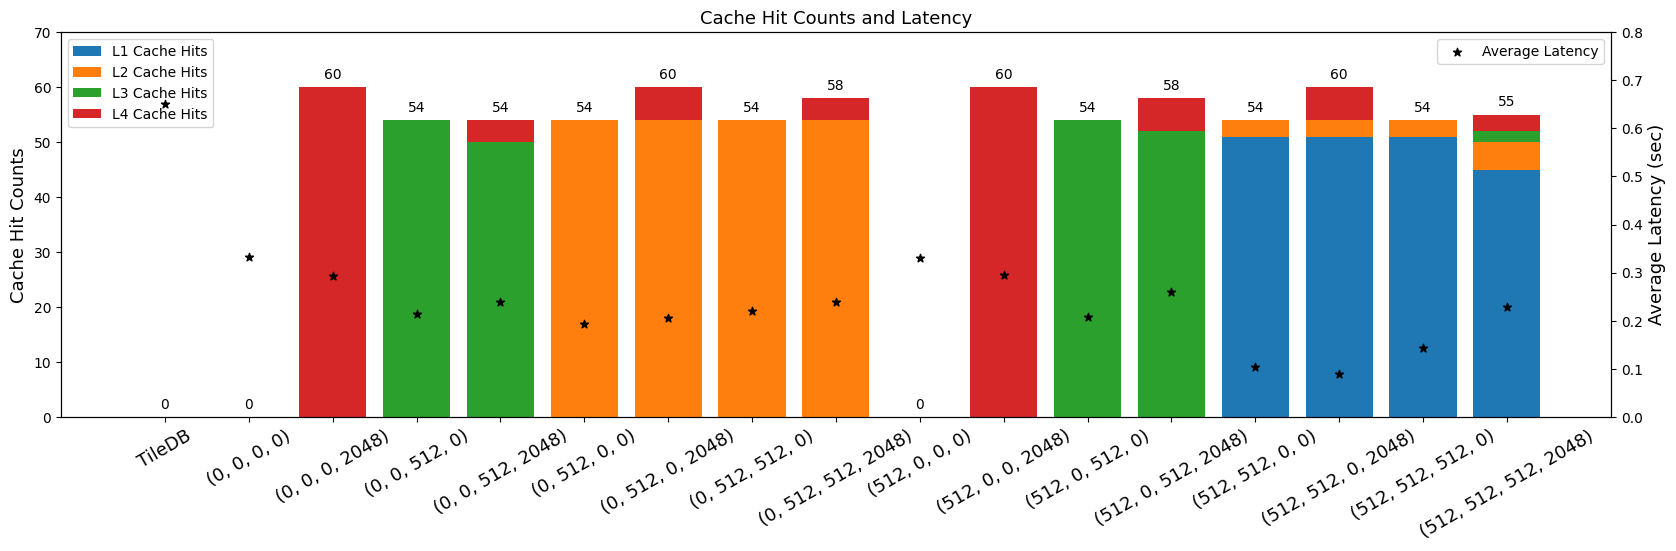

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
hanrei = hanrei
uchiwake = HitUchiwake
latency = latency  # Replace with your actual latency data

# Extract L1, L2, L3, L4 cache hit values separately
l1_hits = [item[0] for item in uchiwake]
l2_hits = [item[1] for item in uchiwake]
l3_hits = [item[2] for item in uchiwake]
l4_hits = [item[3] for item in uchiwake]

# Create a stacked bar chart
fig, ax1 = plt.subplots(figsize=figure_size)

# Calculate the bottom positions for each category to stack the bars
bottom_l1 = np.zeros(len(hanrei))
bottom_l2 = np.add(bottom_l1, l1_hits)
bottom_l3 = np.add(bottom_l2, l2_hits)
bottom_l4 = np.add(bottom_l3, l3_hits)

# Define custom colors for each category
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']

for i in range(len(hanrei)):
    ax1.bar(hanrei[i], l1_hits[i], bottom=bottom_l1[i], color=colors[0])
    ax1.bar(hanrei[i], l2_hits[i], bottom=bottom_l2[i], color=colors[1])
    ax1.bar(hanrei[i], l3_hits[i], bottom=bottom_l3[i], color=colors[2])
    ax1.bar(hanrei[i], l4_hits[i], bottom=bottom_l4[i], color=colors[3])

# Plot the stacked bars
ax1.bar(hanrei, l1_hits, label='L1 Cache Hits', bottom=bottom_l1, color=colors[0])
ax1.bar(hanrei, l2_hits, label='L2 Cache Hits', bottom=bottom_l2, color=colors[1])
ax1.bar(hanrei, l3_hits, label='L3 Cache Hits', bottom=bottom_l3, color=colors[2])
ax1.bar(hanrei, l4_hits, label='L4 Cache Hits', bottom=bottom_l4, color=colors[3])

# Label the first y-axis (Cache Hit Counts)
ax1.set_ylabel("Cache Hit Counts", fontsize=fontSize)

# Rotate x-axis labels for better readability
ax1.set_xticks(hanrei)
ax1.set_xticklabels(hanrei, rotation=rotangle, fontsize=fontSize)

# Annotate the bars with their values within the bars
for i, total in enumerate(np.add(np.add(np.add(l1_hits, l2_hits), l3_hits), l4_hits)):
    ax1.annotate(f"{total}", (i, total + 1), ha='center', va='bottom', fontsize=10)

# Add a legend
ax1.legend()

# Create a second y-axis (twin) for latency
ax2 = ax1.twinx()
ax2.scatter(hanrei, latency, label='Average Latency', color='k', marker='*')

# Label the second y-axis (Latency)
ax2.set_ylabel("Average Latency (sec)", color='k', fontsize=fontSize)

# Add a legend for the second y-axis
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1, labels1, loc="upper left")
ax2.legend(lines2, labels2, loc="upper right")

# Set the y-axis limits for both axes
ax1.set_ylim(0, HitCountsmax)
ax2.set_ylim(0, latency_y_max)  # Adjust the range for latency if needed

# Add a title
plt.title("Cache Hit Counts and Latency", fontsize=fontSize)

# Save the chart
file_name = f"new_scanning_tol={tol}_analTIme={UserAnal}_cachehitDetail_latency={Tclatency}ms.png"
fig.savefig(file_name, bbox_inches='tight', format="png", dpi=300)

# Show the chart
plt.show()

/tmp/ipykernel_1323097/1525292315.py:70: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(hanrei, rotation=rotangle, fontsize=fontSize)


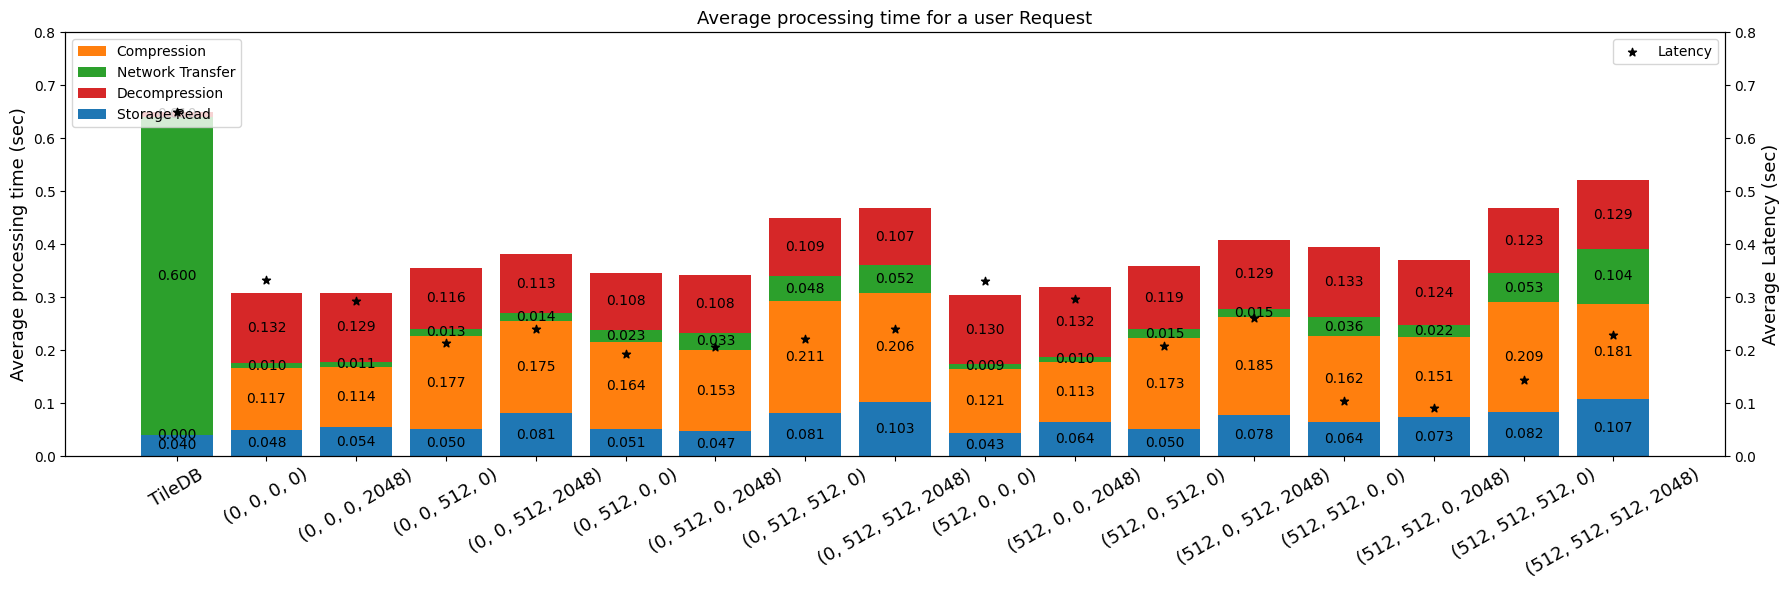

In [12]:

################ ユーザのリクエストに対する各ステップの平均処理時間の内訳 ################



# Sample data
categories = hanrei
data = UserReqLatUchiwake

# Create a stacked bar chart
fig, ax1 = plt.subplots(figsize=(18,6))

# Extract StorageRead, Compression, NetworkLatency, and Decompression values separately
storage_read = [item[0] for item in data]
compression = [item[1] for item in data]
network_latency = [item[2] for item in data]
decompression = [item[3] for item in data]

# Calculate the bottom positions for each category to stack the bars
bottom_storage_read = np.zeros(len(categories))
bottom_compression = np.add(bottom_storage_read, storage_read)
bottom_network_latency = np.add(bottom_compression, compression)
bottom_decompression = np.add(bottom_network_latency, network_latency)

# Plot the stacked bars and add annotations for each segment
for i in range(len(categories)):
    ax1.bar(categories[i], storage_read[i], bottom=bottom_storage_read[i], label='Storage Read', color='tab:blue')
    ax1.annotate(f'{storage_read[i]:.3f}', (categories[i], bottom_storage_read[i] + storage_read[i] / 2),
                ha='center', va='center', fontsize=10, color='black')

    ax1.bar(categories[i], compression[i], bottom=bottom_compression[i], label='Compression', color='tab:orange')
    ax1.annotate(f'{compression[i]:.3f}', (categories[i], bottom_compression[i] + compression[i] / 2),
                ha='center', va='center', fontsize=10, color='black')

    ax1.bar(categories[i], network_latency[i], bottom=bottom_network_latency[i], label='Network Transfer', color='tab:green')
    ax1.annotate(f'{network_latency[i]:.3f}', (categories[i], bottom_network_latency[i] + network_latency[i] / 2),
                ha='center', va='center', fontsize=10, color='black')

    ax1.bar(categories[i], decompression[i], bottom=bottom_decompression[i], label='Decompression', color='tab:red')
    ax1.annotate(f'{decompression[i]:.3f}', (categories[i], bottom_decompression[i] + decompression[i] / 2),
                ha='center', va='center', fontsize=10, color='black')




# Create a second y-axis (twin) for latency
ax2 = ax1.twinx()
ax2.scatter(hanrei, latency, label='Latency', color='k', marker='*')

# Label the second y-axis (Latency)
ax2.set_ylabel("Average Latency (sec)", color='k', fontsize=fontSize)

# Add a legend for the second y-axis
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines2, labels2, loc="upper right")

# Set the y-axis limits for both axes
ax1.set_ylim(0, HitCountsmax)
ax2.set_ylim(0, latency_y_max)  # Adjust the range for latency if needed


# Label the axes and add a titl3
# plt.xlabel("Cache Structure",fontsize=13)
ax1.set_ylabel("Average processing time (sec)",fontsize=13)
plt.title(f"Average processing time for a user Request",fontsize=fontSize)

# Rotate x-axis labels for better readability
# ax1.xticks(rotation=rotangle,fontsize=fontSize)
ax1.set_xticklabels(hanrei, rotation=rotangle, fontsize=fontSize)

# Add a legend with only four labels
handles, labels = ax1.get_legend_handles_labels()
unique_labels = list(set(labels))[:4]  # Keep only the first four unique labels
ax1.legend([handles[labels.index(label)] for label in unique_labels], unique_labels, loc="upper left")
ax1.set_ylim(0,latency_y_max)

file_name = f"new_scanning_tol={tol}_analTIme={UserAnal}_eachProc_latency_{Tclatency}ms.png"

fig.tight_layout()
# Show the chart
fig.savefig(file_name,bbox_inches='tight',format="png",dpi=300)



